# World Happiness Score

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [264]:
df1=pd.read_csv('happiness_score_dataset.csv')
df1

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


We have 158 rows and 12 columns in data set of World happines score.

# EDA of Dataset

In [265]:
ds_1=pd.DataFrame(data=df1)
ds_1.shape

(158, 12)

In [266]:
ds_1.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

we have float type values in 9 variables , int value in 1 varibales and object values in 2 variales in dataset

In [267]:
ds_1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [268]:
ds_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

From above info we can able to see that there are no missing values in dataset and whole dataset consumes the memory of14.9+ KB memory

In [269]:
ds_1.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


Description:
    -In GDP per captia Std is less than than mean which shows that data is more reliable and  spreaded closely near to mean.
    -Mean of family scores shows avg good score in all reigions describs that most of regions get good support from their friends and families.
    -Life expectancy mean and median score is nearly related which shows the symmetric distrbution.
    -In Freedom 75% percentile  is 0.54 score so avergly most of countries are lie below that score.
    -Trust on govt policies and corruption score at 25% tile is 0.06 which shows that average of 25% of countries have less trust on govt policy
    -Max generosity shows by countries average is 0.8
    -Dystopia residual average life or score is rated at 2.09
    -Happiness score rated between 0 to 10 scale , average all over the world happiness is 5.37 and std is 1.14 less than mean and median shows reliabel data and less spreaded.
    

# Country with lowest life expectancy score

In [270]:
ds_1.sort_values('Health (Life Expectancy)',axis=0,ascending=True)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
122,Sierra Leone,Sub-Saharan Africa,123,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009,4.507
127,Botswana,Sub-Saharan Africa,128,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181,4.332
147,Central African Republic,Sub-Saharan Africa,148,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,3.678
100,Swaziland,Sub-Saharan Africa,101,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676,4.867
96,Lesotho,Sub-Saharan Africa,97,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,4.898
...,...,...,...,...,...,...,...,...,...,...,...,...
35,Spain,Western Europe,36,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367,6.329
46,South Korea,Eastern Asia,47,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,5.984
45,Japan,Eastern Asia,46,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,5.987
71,Hong Kong,Eastern Asia,72,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,5.474


# Mutlivariate analysis

In [271]:
ds_1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

This shows that there is no missing or null values in dataset

<AxesSubplot:>

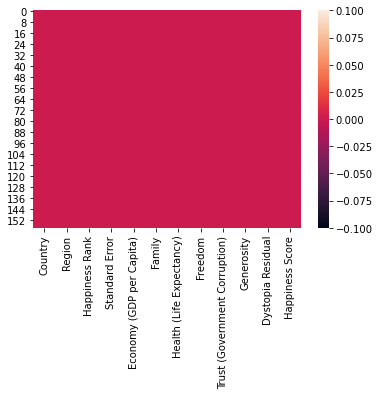

In [272]:
sns.heatmap(ds_1.isnull())

In [273]:
dscorr=ds_1.corr()
dscorr

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.992105
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


<AxesSubplot:>

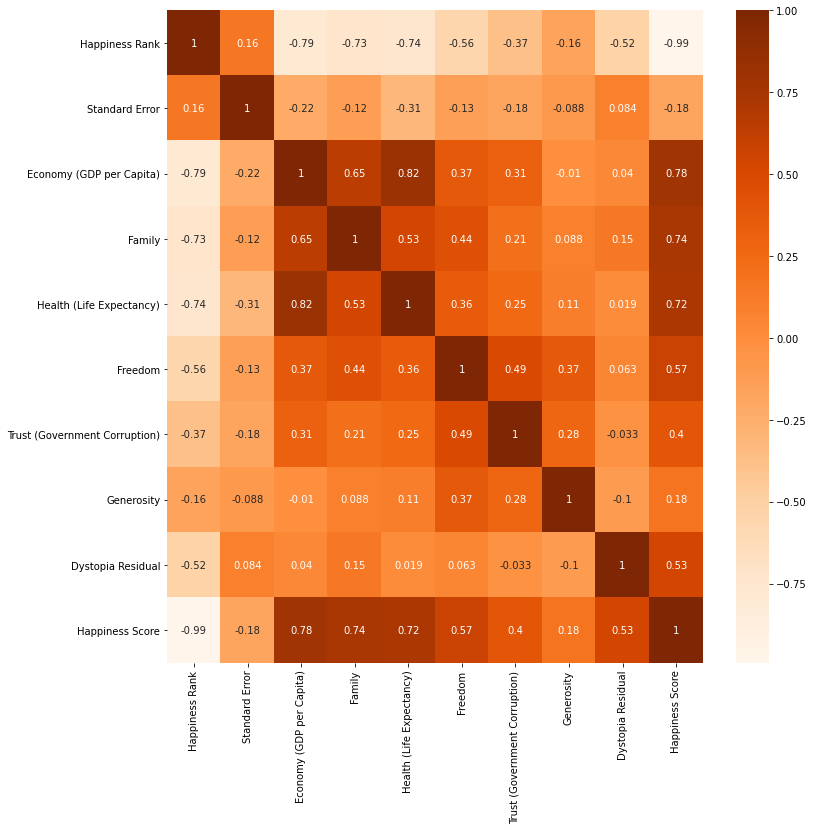

In [274]:
fig=plt.figure(figsize=(12,12))
dscorr=ds_1.corr(method='pearson')             
sns.heatmap(dscorr,annot=True,cmap='Oranges')

# Comparing Happiness Scores across regions

                                 Happiness Rank  Standard Error  \
Region                                                            
Australia and New Zealand              9.500000        0.037270   
Central and Eastern Europe            79.000000        0.045208   
Eastern Asia                          64.500000        0.037225   
Latin America and Caribbean           46.909091        0.061127   
Middle East and Northern Africa       77.600000        0.046337   
North America                         10.000000        0.036960   
Southeastern Asia                     81.222222        0.042691   
Southern Asia                        113.142857        0.032161   
Sub-Saharan Africa                   127.900000        0.055299   
Western Europe                        29.523810        0.037625   

                                 Economy (GDP per Capita)    Family  \
Region                                                                
Australia and New Zealand                        1.29

<AxesSubplot:title={'center':'Happiness score across different regions'}, xlabel='Happiness Score', ylabel='Region'>

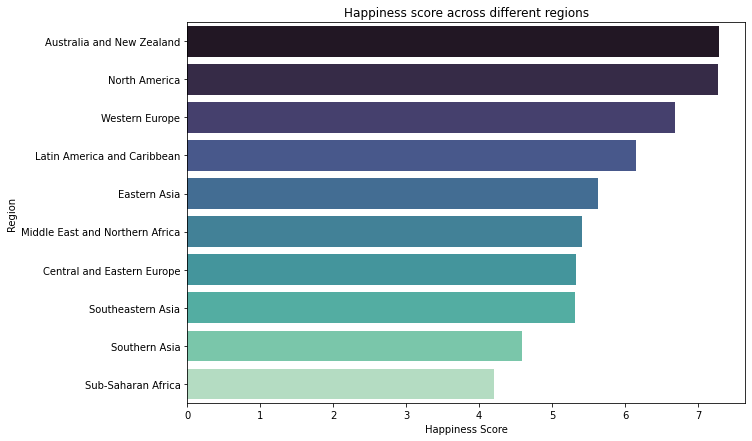

In [275]:
region=ds_1.groupby(['Region']).mean()
region_ds=pd.DataFrame(data=region)
print(region_ds)
reg=region_ds.sort_values(by='Happiness Score',ascending=False,axis=0)

plt.figure(figsize=(10,7))
plt.title('Happiness score across different regions')
sns.barplot(x='Happiness Score',y=reg.index,data=reg,palette='mako')


# Checking and removing Outliers

In [276]:
ds_1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

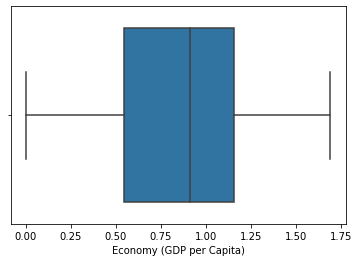

In [277]:
sns.boxplot(ds_1['Economy (GDP per Capita)'])

Economy(GDP per captia) doesnt have any outliers value in its column.

<AxesSubplot:xlabel='Family'>

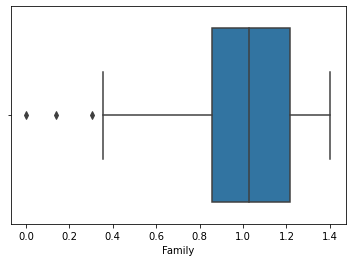

In [278]:
sns.boxplot(ds_1['Family'])

Family variable in dataset is having outliers value.

<AxesSubplot:xlabel='Health (Life Expectancy)'>

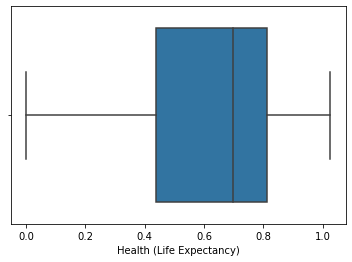

In [279]:
sns.boxplot(ds_1['Health (Life Expectancy)'])

Health life expectancy varaible doesnt have any outliers

In [280]:
df=ds_1.iloc[:,4:12]
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


Economy (GDP per Capita)            AxesSubplot(0.125,0.125;0.0824468x0.755)
Family                           AxesSubplot(0.223936,0.125;0.0824468x0.755)
Health (Life Expectancy)         AxesSubplot(0.322872,0.125;0.0824468x0.755)
Freedom                          AxesSubplot(0.421809,0.125;0.0824468x0.755)
Trust (Government Corruption)    AxesSubplot(0.520745,0.125;0.0824468x0.755)
Generosity                       AxesSubplot(0.619681,0.125;0.0824468x0.755)
Dystopia Residual                AxesSubplot(0.718617,0.125;0.0824468x0.755)
Happiness Score                  AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

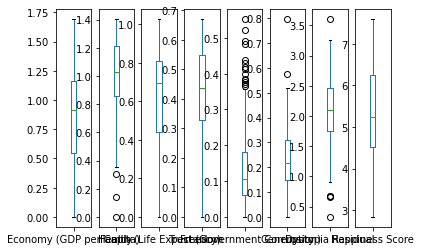

In [281]:
df.plot(kind='box',subplots=True,layout=(1,8))

Trust and Generosity varaibles also have outliers in their dataset.

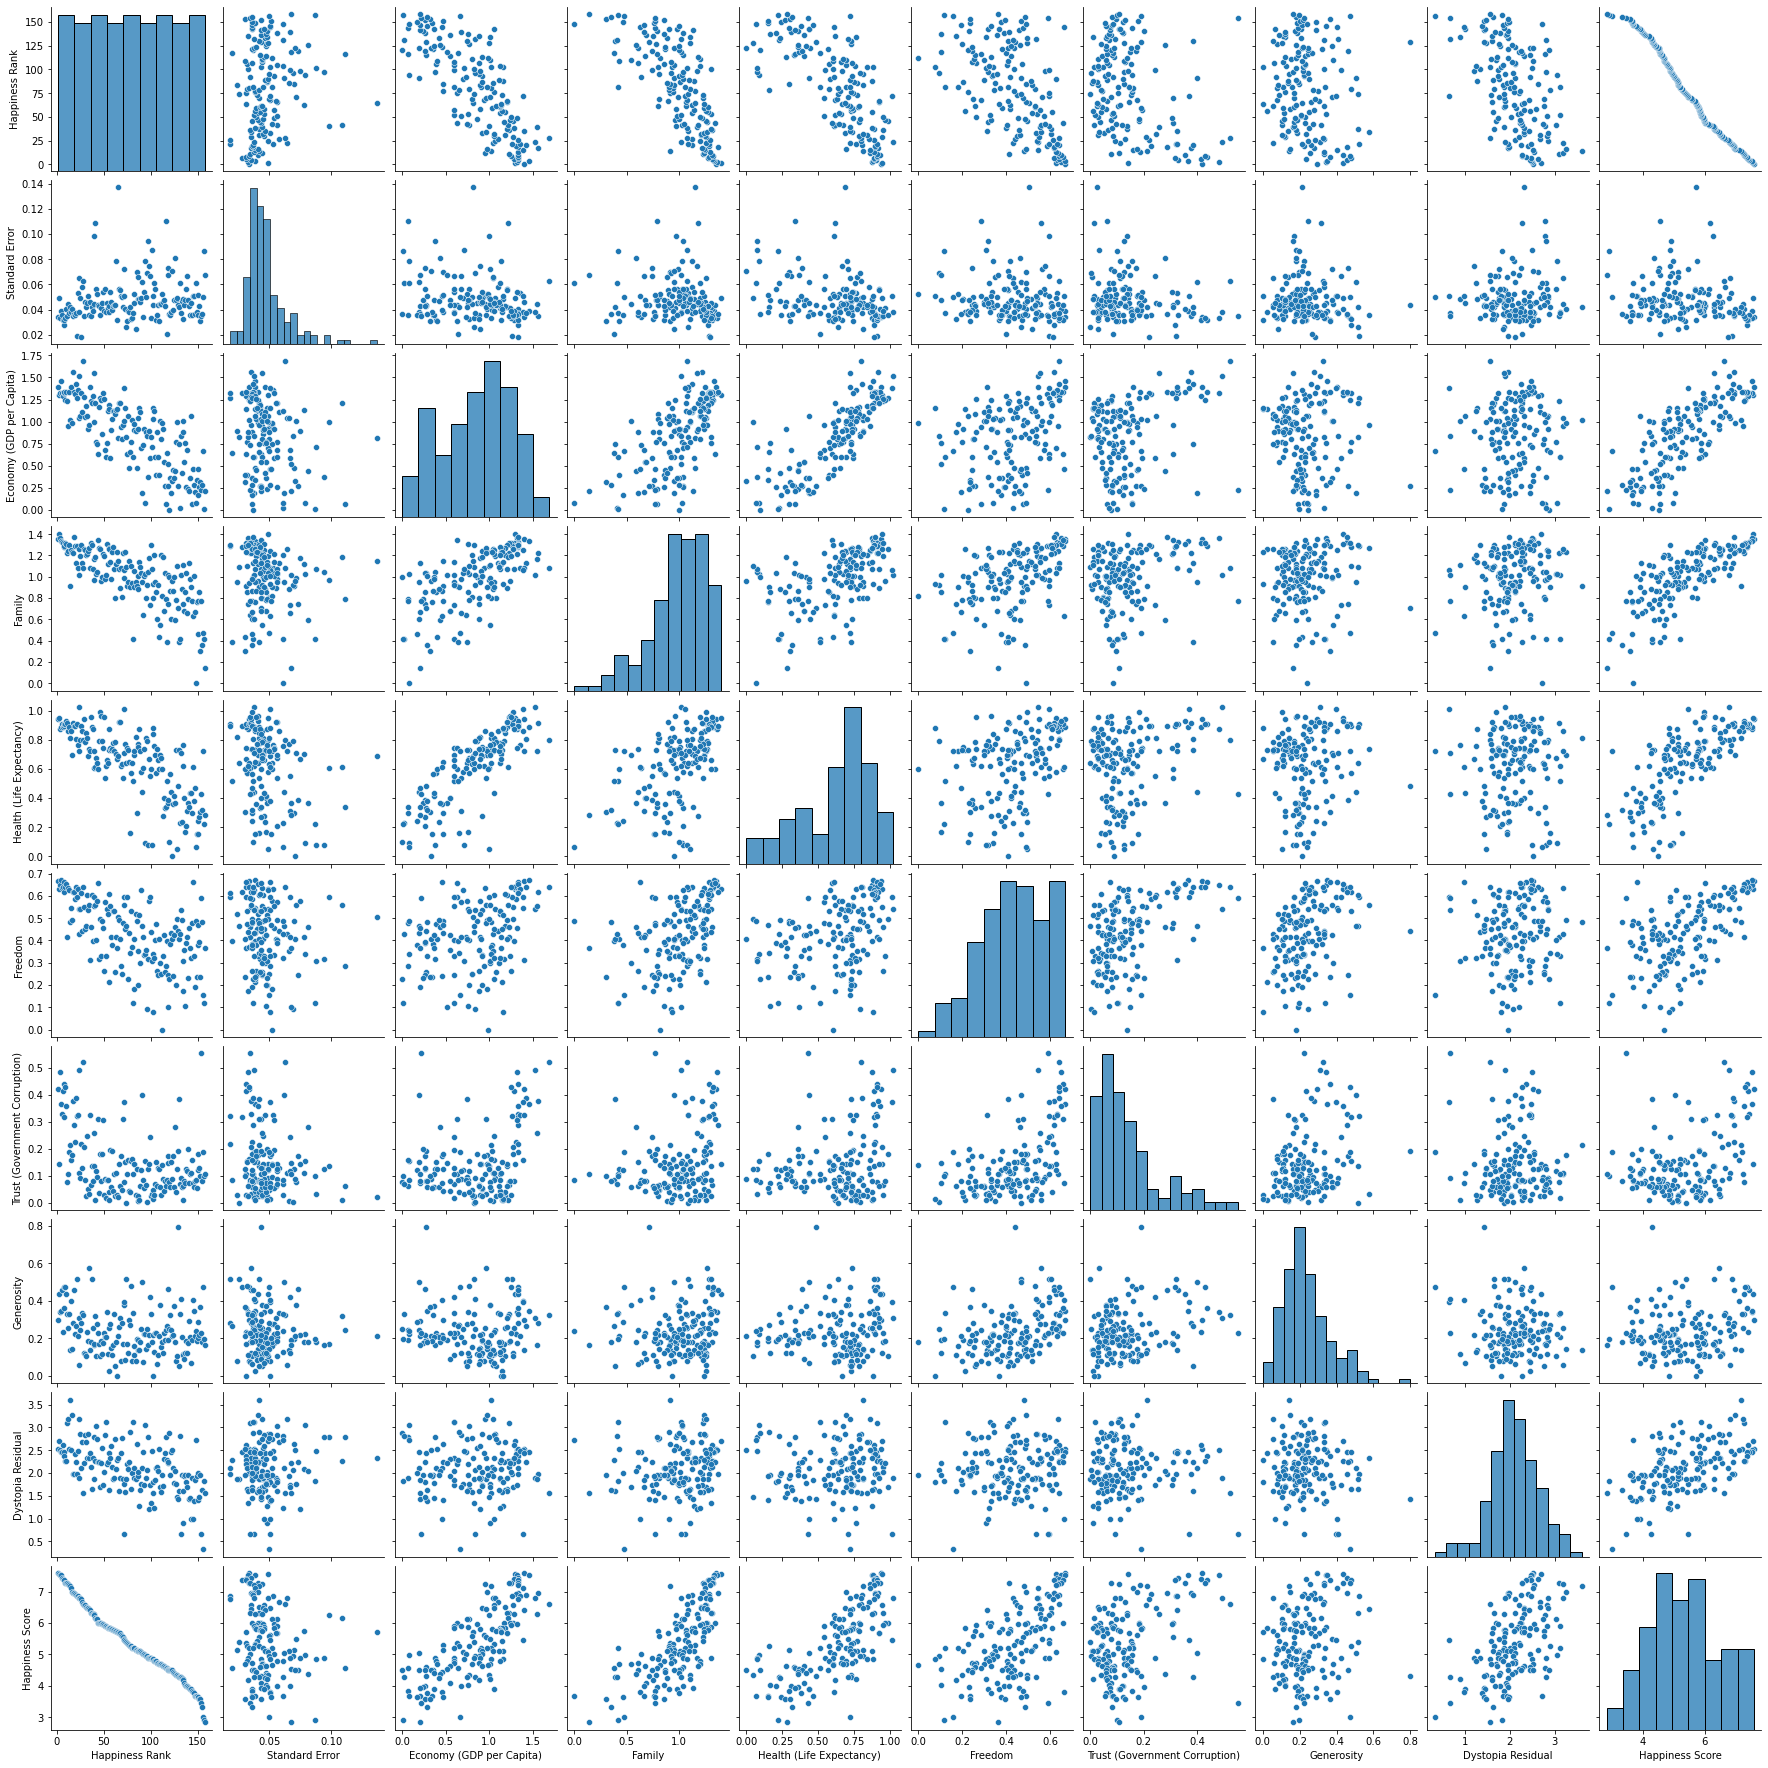

In [282]:
sns.pairplot(ds_1)

# Checking the Skewness

In [283]:
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

As skewness for 6 varaible is between -.5 and +.5 so there is no skewness has been found in following variables of dataset.

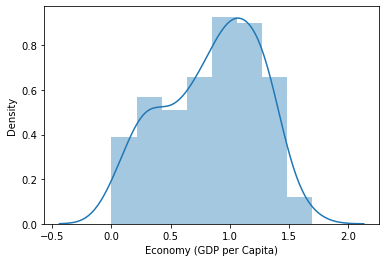

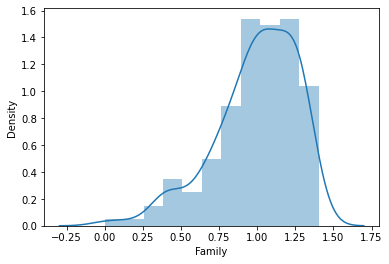

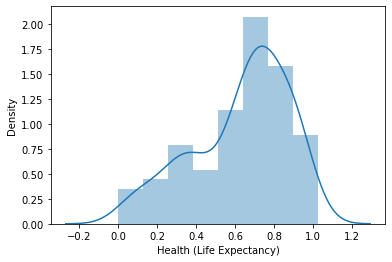

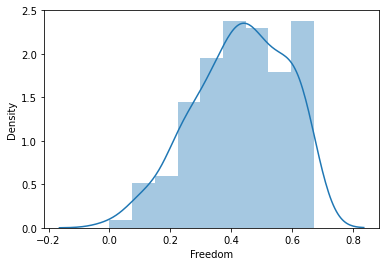

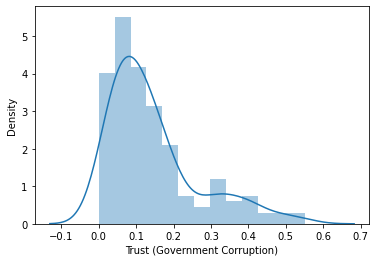

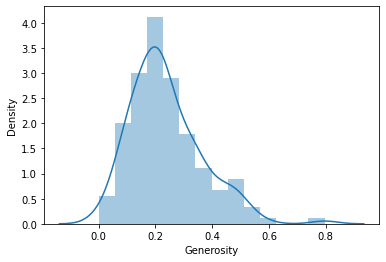

In [284]:
columns=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

for i in ds_1[columns]:
    plt.figure()
    sns.distplot(ds_1[i])

# Removing the outliers

In [285]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([4, 5, 1, 4, 6, 1], dtype=int64))


In [286]:
zscr[27][5]

0.7002859955330124

In [287]:
zscr[153][4]

3.4139224398643333

In [288]:
print('shape before removing outliers:',df.shape)

dfnew=df[(zscr<3).all(axis=1)]

print('shape after removing outliers:',dfnew.shape)

shape before removing outliers: (158, 8)
shape after removing outliers: (152, 8)


# New Dataset has been found after refining the data from outliers

In [289]:
ds1=dfnew
ds1

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


In [290]:
ds1.columns=ds1.columns.str.replace('_','')

In [291]:
x=ds1.iloc[:,0:-2]
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260


Above is our x data containing 6 independent variables which will effect the our dependent varibale of happiness score.

In [292]:
y=ds1.iloc[:,-1]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

Y is target varibale (Happiness score) dependent on changes of 6 independent variables. 

In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(106, 6)
(46, 6)
(106,)
(46,)


#Now we have sent the 70% of x data in training and 30% of data in testing to predict the y target (happiness score)
so 106 rows are trained while 46 rows are sent for testing.

# Model Analysis & Training

In [294]:
lg=LinearRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
lg.score(x_train,y_train)
print('R_2score is:',r2_score(y_test,predlg))
print('error:')
print('Mean_squared error:',mean_squared_error(y_test,predlg))
print('Mean_absolute error:',mean_absolute_error(y_test,predlg))

R_2score is: 0.8233213462184215
error:
Mean_squared error: 0.2527833933649681
Mean_absolute error: 0.39655836686414503


Through Linear regression model we found that its performance is 82% in the dataset having MSE error of 0.25 and mae error is 0.39

So there is 39% difference between expected and predicted values out of total predicted values.

In [295]:
print('Predicted score:',predlg)
print('Actual score:',y_test)

Predicted score: [7.23690817 5.89821998 4.37304499 7.14128185 6.38157505 6.51385129
 5.51129933 4.17031304 4.69914251 4.16064461 5.94238586 4.73722845
 4.12100335 4.54569619 4.09520026 6.67282965 5.66759568 3.9708141
 5.29101666 5.15240793 5.20680162 3.12831691 4.32248864 5.87678508
 7.04989956 3.97622583 5.12470566 6.14953356 6.25852286 4.17404405
 4.42027642 5.11158067 3.63066056 5.70314257 6.74128805 4.75276753
 5.68311226 6.0588049  5.10028953 6.33372337 6.04896645 4.60402626
 6.94003723 5.6886787  6.03207445 6.40619751]
Actual score: 0      7.587
44     5.995
132    4.252
3      7.522
35     6.329
45     5.987
39     6.269
108    4.694
126    4.350
143    3.845
29     6.574
129    4.297
116    4.565
117    4.550
136    4.033
36     6.302
70     5.477
146    3.681
41     6.130
90     5.057
86     5.123
156    2.905
118    4.518
52     5.878
4      7.427
115    4.571
94     4.959
65     5.695
10     7.278
93     4.971
114    4.610
98     4.876
149    3.656
103    4.800
25     6.750


In [296]:
print('coefficient:',lg.coef_)
print('intercept:',lg.intercept_)

coefficient: [0.65734943 1.44479189 1.24331826 0.89116824 1.30653901 0.55439864]
intercept: 1.8925266960072373


# Will set underfitting or overfitting of model through cross validation score

In [297]:
lgscores=cross_val_score(lg,x,y,cv=10)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[-22.78846046  -8.32980005  -5.9604364  -54.46684577 -13.53855264
 -56.48308376 -59.89508165 -39.72058921 -19.42523311  -7.25926561]
-28.786734866149658 20.671033687327725


Decision Tree Regressor

In [298]:
dtr=DecisionTreeRegressor(max_depth=8,min_samples_leaf=2)
dtr.fit(x_train,y_train)
predt=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print('R_2 score:',r2_score(y_test,predt))
print('MSE score :',mean_squared_error(y_test,predt))
print('MAE:',mean_absolute_error(y_test,predt))

0.9515461618158342
R_2 score: 0.623479417341018
MSE score : 0.5387076962560385
MAE: 0.5804601449275363


Decision tree model fits 95% to this data with accuracy of 61%(r_score).

While there is chance of error between expected and predicted value is 58% which is high.

Will set the under and overfiting for this model

In [299]:
dtrscores=cross_val_score(dtr,x,y,cv=10)
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[ -30.53207861  -34.19436814  -29.27438798 -119.93145553  -25.83951814
 -106.59673563 -124.59054233  -93.87544813  -36.18378986  -11.63207184]
-61.265039620603545 41.974367352634026


In [300]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print(knn.score(x_train,y_train))
print('R_2 score:',r2_score(y_test,pred_k))
print('MSE score :',mean_squared_error(y_test,pred_k))
print('MAE:',mean_absolute_error(y_test,pred_k))

0.8020272523993055
R_2 score: 0.7674437780004311
MSE score : 0.33273035359361136
MAE: 0.4539596273291926


In [301]:
knnscores=cross_val_score(knn,x,y,cv=10)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[-28.62898256 -11.92877198 -12.47220303 -58.67896845 -14.97060653
 -78.36767392 -81.40205105 -44.4230744  -19.55586917 -11.47338328]
-36.19015843709362 26.349195674252528


Here also model is having +ve mse therefore API is minimizing the score and move to left positive values.

Having avg mean of 36% accuracy.

In [302]:
kernellist=['linear','rbf','poly']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    preds=sv.predict(x_test)
    print('kernellist:',i)
    print(sv.score(x_train,y_train))
    print('R2_score:',r2_score(y_test,preds))
    print('MSE score :',mean_squared_error(y_test,preds))
    print('MAE:',mean_absolute_error(y_test,preds))

kernellist: linear
0.7537486701517316
R2_score: 0.8202800087822522
MSE score : 0.25713479395031114
MAE: 0.3985056132482722
kernellist: rbf
0.7832819281558523
R2_score: 0.7964612574754193
MSE score : 0.29121352758443203
MAE: 0.4355810801489146
kernellist: poly
0.7829887115567502
R2_score: 0.769975716487663
MSE score : 0.3291077767350332
MAE: 0.4552112649300485


In [303]:
svscores=cross_val_score(sv,x,y,cv=10)
print(svscores)
print(svscores.mean(),svscores.std())

[-18.42968316 -10.63462041 -12.31271348 -77.42811942 -12.51346266
 -50.86145772 -47.04750669 -24.35260698 -16.28607351 -10.76126447]
-28.062750850782994 21.576186165182623


In [304]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [305]:
ada=AdaBoostRegressor(n_estimators=100)
ada.fit(x_train,y_train)
predicta=ada.predict(x_test)
print(ada.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predicta))
print('MSE score :',mean_squared_error(y_test,predicta))
print('MAE:',mean_absolute_error(y_test,predicta))

0.8998025543614374
R2_score: 0.7275209117414776
MSE score : 0.3898500870180589
MAE: 0.5137864649469376


In [306]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predictrf=rf.predict(x_test)
print(rf.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predicta))
print('MSE score :',mean_squared_error(y_test,predicta))
print('MAE:',mean_absolute_error(y_test,predicta))

0.9598485900930195
R2_score: 0.7275209117414776
MSE score : 0.3898500870180589
MAE: 0.5137864649469376


In [307]:
gb=GradientBoostingRegressor(n_estimators=100)
gb.fit(x_train,y_train)
preditg=gb.predict(x_test)
print(gb.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predicta))
print('MSE score :',mean_squared_error(y_test,predicta))
print('MAE:',mean_absolute_error(y_test,predicta))

0.9913475748835217
R2_score: 0.7275209117414776
MSE score : 0.3898500870180589
MAE: 0.5137864649469376


In [308]:
rfscores=cross_val_score(rf,x,y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[-27.00050128 -15.26414506 -10.37768858 -66.19043688 -13.15305293
 -54.63957142 -59.40469666 -34.4886106  -29.51274406 -12.94436872]
-32.29758162030578 19.836784819897822


In [309]:
adascores=cross_val_score(ada,x,y,cv=10)
print(adascores)
print(adascores.mean(),adascores.std())

[-38.17782868 -14.44920093 -12.8906258  -84.19724895 -15.02627596
 -50.30111487 -54.68947512 -30.02187886 -27.90191368 -14.17495184]
-34.18305146968407 22.05572481235019


In [310]:
gbscores=cross_val_score(rf,x,y,cv=10)
print(gbscores)
print(gbscores.mean(),gbscores.std())

[-26.92776878 -16.17909057  -9.46822584 -61.58553848 -13.6694638
 -55.63250311 -66.6379361  -36.34005208 -28.32701327 -11.92768944]
-32.66952814592969 20.454940410375478


# Hypertuning of parameters for different models

In [311]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
clf
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [312]:
sv=SVR(kernel='linear',C=1)
sv.fit(x,y)
h=sv.score(x,y)
print(round(h,2))
predicts=sv.predict(x_test)
print('R2_score:',r2_score(y_test,predicts))
print('Mean_squared_error:',mean_squared_error(y_test,predicts))
print('Mean_absoulute_error:',mean_absolute_error(y_test,predicts))

0.78
R2_score: 0.8278234453492561
Mean_squared_error: 0.24634200459954983
Mean_absoulute_error: 0.3819601130721185


In [313]:
grid_param={'splitter':['best','random'],'max_depth':[9,11,12],'min_samples_leaf':[3,4,5],'max_features':['auto','log2','sqrt',None]}
gd_sr=GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [314]:
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=-2.091, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=-0.900, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=-1.469, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=-1.727, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.626, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, splitter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=-2.074, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.518, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=-1.327, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=-2.428, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=-0.762, total=   0.0s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=-1.310, total=   0.0s
[CV] max_depth=9, max_

[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=best, score=-2.074, total=   0.0s
[CV] max_depth=9, max_features=None, min_samples_leaf=5, splitter=best 
[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=best, score=-0.518, total=   0.0s
[CV] max_depth=9, max_features=None, min_samples_leaf=5, splitter=best 
[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=best, score=-1.327, total=   0.0s
[CV] max_depth=9, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=random, score=-1.816, total=   0.0s
[CV] max_depth=9, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=random, score=-0.514, total=   0.0s
[CV] max_depth=9, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=9, max_features=None, min_samples_leaf=5, splitter=random, score=-1.741, total=   0.0s
[CV] max_depth=11, max

[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.759, total=   0.0s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-1.118, total=   0.0s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-2.106, total=   0.0s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.382, total=   0.0s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-1.185, total=   0.0s
[CV] max_de

[CV]  max_depth=12, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.801, total=   0.0s
[CV] max_depth=12, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  max_depth=12, max_features=log2, min_samples_leaf=3, splitter=best, score=-1.302, total=   0.0s
[CV] max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random, score=-2.843, total=   0.0s
[CV] max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.575, total=   0.0s
[CV] max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random, score=-1.432, total=   0.0s
[CV] max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best, score=-1.472, total=   0.0s
[CV] max_de

[CV]  max_depth=12, max_features=None, min_samples_leaf=5, splitter=best, score=-0.518, total=   0.0s
[CV] max_depth=12, max_features=None, min_samples_leaf=5, splitter=best 
[CV]  max_depth=12, max_features=None, min_samples_leaf=5, splitter=best, score=-1.327, total=   0.0s
[CV] max_depth=12, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=12, max_features=None, min_samples_leaf=5, splitter=random, score=-1.667, total=   0.0s
[CV] max_depth=12, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=12, max_features=None, min_samples_leaf=5, splitter=random, score=-0.646, total=   0.0s
[CV] max_depth=12, max_features=None, min_samples_leaf=5, splitter=random 
[CV]  max_depth=12, max_features=None, min_samples_leaf=5, splitter=random, score=-1.326, total=   0.0s
{'max_depth': 11, 'max_features': None, 'min_samples_leaf': 5, 'splitter': 'random'}
-1.0593253416168347


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    3.6s finished


In [332]:
dtr=DecisionTreeRegressor(max_depth=11,min_samples_leaf=5,splitter='random')
dtr.fit(x_train,y_train)
predictd=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predictd))
print('Mean_squared_error:',mean_squared_error(y_test,predictd))
print('Mean_absoulute_error:',mean_absolute_error(y_test,predictd))

0.7389302687928887
R2_score: 0.5620774489596503
Mean_squared_error: 0.6265587048216751
Mean_absoulute_error: 0.6431384575569359


In [334]:
Parameters={'learning_rate':[.02,.03,.04],'subsample':[.1,.5,.9],'n_estimators':[100,150,200],'max_depth':[6,8,10]}
grd_GBR=GridSearchCV(estimator=gb,param_grid=Parameters,cv=3,n_jobs=-1)
grd_GBR.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03, 0.04],
                         'max_depth': [6, 8, 10],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.1, 0.5, 0.9]})

In [338]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grd_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grd_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grd_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=10, subsample=0.1)

 The best score across ALL searched params:
 0.719513532361839

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.1}


In [339]:
GBR=GradientBoostingRegressor(learning_rate=.03,max_depth=10,n_estimators=100,subsample=.1)
GBR.fit(x_train,y_train)
predictg=GBR.predict(x_test)
print(GBR.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predictg))
print('Mean_squared_error:',mean_squared_error(y_test,predictg))
print('Mean_absoulute_error:',mean_absolute_error(y_test,predictg))

0.8249200604917049
R2_score: 0.7529854847173617
Mean_squared_error: 0.35341659021661903
Mean_absoulute_error: 0.4908863322517198


In [340]:
grid_param={'max_depth':[9,11,12],'min_samples_leaf':[3,4,5],'max_features':['auto','log2','sqrt',None]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [341]:
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=9, max_features=auto, min_samples_leaf=3 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, score=-1.605, total=   0.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=9, max_features=auto, min_samples_leaf=3 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, score=-0.325, total=   0.3s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, score=-1.309, total=   0.3s
[CV] max_depth=9, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=4, score=-1.633, total=   0.2s
[CV] max_depth=9, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=4, score=-0.339, total=   0.3s
[CV] max_depth=9, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=4, score=-1.283, total=   0.3s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, score=-1.629, total=   0.2s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, score=-0.296, total=   0.2s
[CV] max_depth=9, max_features=auto, min_samples_leaf=5 ..............
[CV]  max_depth=9, max_features=auto, min_samples_leaf=5, 

[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=3, score=-0.276, total=   0.3s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=3, score=-1.337, total=   0.2s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, score=-1.729, total=   0.3s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, score=-0.285, total=   0.3s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=4 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=4, score=-1.363, total=   0.3s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=5 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=5, score=-1.766, total=   0.3s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=5 .............
[CV]  max_depth=11, max_features=sqrt, min_samples_l

[CV]  max_depth=12, max_features=None, min_samples_leaf=5, score=-1.341, total=   0.2s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   29.0s finished


{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 3}
-1.06682767511431


In [342]:
rf=RandomForestRegressor(max_depth=11,max_features='auto',min_samples_leaf=3)
rf.fit(x_train,y_train)
predictr=rf.predict(x_test)
print(rf.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predictr))
print('Mean_squared_error:',mean_squared_error(y_test,predictr))
print('Mean_absoulute_error:',mean_absolute_error(y_test,predictr))

0.91373899626067
R2_score: 0.7525483717303865
Mean_squared_error: 0.35404199063577835
Mean_absoulute_error: 0.48010752340654483


In [343]:
grid_parameters={'n_estimators':[100,150,200],'learning_rate':[.1,.01,.001],'random_state':[0,1]}
grd_ADA=GridSearchCV(estimator=ada,param_grid=grid_parameters,scoring='neg_mean_squared_error',n_jobs=1,cv=3)
grd_ADA.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(n_estimators=100), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 150, 200],
                         'random_state': [0, 1]},
             scoring='neg_mean_squared_error')

In [344]:
best_param=grd_ADA.best_params_
print(best_param)
best_result=grd_ADA.best_score_
print(best_result)

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 1}
-0.4033550406747894


In [345]:
ADA=AdaBoostRegressor(learning_rate=.1,n_estimators=200,random_state=1)
ADA.fit(x_train,y_train)
predicta=ADA.predict(x_test)
print(ADA.score(x_train,y_train))
print('R2_score',r2_score(y_test,predicta))
print('Mean_squared_error:',mean_squared_error(y_test,predicta))
print('Mean_absolute_error:',mean_absolute_error(y_test,predicta))

0.8893860324679531
R2_score 0.7326573306794797
Mean_squared_error: 0.38250114371844895
Mean_absolute_error: 0.5002526784117594


In [346]:
model=[LinearRegression(),DecisionTreeRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),SVR(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('R2_Score of',m,'is:')
    print(r2_score(y_test,predm))
    print('Mean_squared_error:',mean_squared_error(y_test,predm))
    print('Mean_absolute_error:',mean_absolute_error(y_test,predm))

0.7560268296118388
R2_Score of LinearRegression() is:
0.8233213462184215
Mean_squared_error: 0.2527833933649681
Mean_absolute_error: 0.39655836686414503
1.0
R2_Score of DecisionTreeRegressor() is:
0.49942613505423294
Mean_squared_error: 0.7161972173913044
Mean_absolute_error: 0.6754347826086956
0.9913475748835217
R2_Score of GradientBoostingRegressor() is:
0.7099104964795966
Mean_squared_error: 0.41504622946754743
Mean_absolute_error: 0.5253511112322332
0.895065770404629
R2_Score of AdaBoostRegressor() is:
0.7291449851867791
Mean_squared_error: 0.38752644017227317
Mean_absolute_error: 0.5033753015232371
0.7832819281558523
R2_Score of SVR() is:
0.7964612574754193
Mean_squared_error: 0.29121352758443203
Mean_absolute_error: 0.4355810801489146
0.9616319437563352
R2_Score of RandomForestRegressor() is:
0.7521266866382124
Mean_squared_error: 0.3546453175586955
Mean_absolute_error: 0.48388673913043495


In [347]:
import joblib
joblib.dump(lg,'Linear_reg_model.obj')

['Linear_reg_model.obj']

In [348]:
lgfile=joblib.load('Linear_reg_model.obj')
lgfile.predict(x_test)

array([7.23690817, 5.89821998, 4.37304499, 7.14128185, 6.38157505,
       6.51385129, 5.51129933, 4.17031304, 4.69914251, 4.16064461,
       5.94238586, 4.73722845, 4.12100335, 4.54569619, 4.09520026,
       6.67282965, 5.66759568, 3.9708141 , 5.29101666, 5.15240793,
       5.20680162, 3.12831691, 4.32248864, 5.87678508, 7.04989956,
       3.97622583, 5.12470566, 6.14953356, 6.25852286, 4.17404405,
       4.42027642, 5.11158067, 3.63066056, 5.70314257, 6.74128805,
       4.75276753, 5.68311226, 6.0588049 , 5.10028953, 6.33372337,
       6.04896645, 4.60402626, 6.94003723, 5.6886787 , 6.03207445,
       6.40619751])